# 2.2 Feature Extraction
#### <font color='gray'>Vicent Santamarta Martinez</font>

### Computing the 3d position of a point from the image of two cameras

In this exercise we aim to caculate the 3d position of a point P from the images of two cameras. For the sake of the exercise we know the position of the two cameras.

##### Cameras positions

In order to calculate the world position of the point, we need to first have all of the positions (cameras and projections) in the same coordinates space. 

So the first step will be to calculate the relative pose of Camera 1 over Camera 2. 

#### Position of the projected points in the 3D world

Now that we have the positions of the cameras in the same coordinates space we can start to calculate the position of the points in the image in the 3D world. Because we used the camera 2 as our referece for the coordinates space we will start calculating the position of p² from the image in the camera 2.

To do that we need to use the camera specific information. First we calculate x,z coordinates of the camera. For that, we will use the rho (pixel size) value of the camera multiplied by u,v coordinates of the point in the image. The y coordinate will be given by the focal point.

Once we have the x,y,z coordinates we need to transport them to the coordinates space of the corresponent camera.

With this coordinates, we will already have the world position of p2, for p2 we need to transport it from the camera 1 coordinates space to the camera 2 coordinates space. Once we do this we are readdy to calculate 3d position of point P. 

### Computing the coordinates for P

Now that we have the coordinates for all 4 points we can now proceed to estimate the position of P.

For that we will throw a line from camera1 and passes through p1. And another line from camera2 that crosses through p2.

Finding the intersection point of the two rays we will now know the coordinates of P in the coordinates space of the camera2 and can apply a transformation to those coordinates to the world space to have P in the original coordinates space.

### Implementation

In [98]:
#@title="imports"
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"
from IPython.core.display import HTML

import RVC3 as rvc
import sys, os.path
sys.path.append(os.path.join(rvc.__path__[0], 'examples'))

import numpy as np
from scipy import linalg, stats
import matplotlib.pyplot as plt
import math
from math import pi
np.set_printoptions(
    linewidth=120, formatter={
        'float': lambda x: f"{0:8.4g}" if abs(x) < 1e-10 else f"{x:8.4g}"})
np.random.seed(0)
from machinevisiontoolbox.base import *
from machinevisiontoolbox import *
from spatialmath.base import *
from spatialmath import *

In [99]:
# Create the point in the 3D space
P=[0.5, 0.1, 0.8]
# Create the pose for the first camera
CA = SE3.Tx(-0.1) * SE3.Ry(25, unit="deg")
# Create the pose for the second camera
CB = SE3.Tx(0.1) * SE3.Ry(-25, unit="deg")

   0.9063    0        -0.4226    0.1       
   0         1         0         0         
   0.4226    0         0.9063    0         
   0         0         0         1         


In [100]:
# Cameras description
camera1 = CentralCamera(name="camera 1", f=0.002, imagesize=1000, \
                        rho=10e-6, pose=CA) 

           Name: camera 1 [CentralCamera]
     pixel size: 1e-05 x 1e-05
     image size: 1000 x 1000
           pose: t = -0.1, 0, 0; rpy/yxz = 0°, 0°, 25°
   principal pt: [     500      500]
   focal length: [   0.002    0.002]

In [101]:
camera2 = CentralCamera(name="camera 2", f=0.002, imagesize=1000, \
                        rho=10e-6, pose=CB)

           Name: camera 2 [CentralCamera]
     pixel size: 1e-05 x 1e-05
     image size: 1000 x 1000
           pose: t = 0.1, 0, 0; rpy/yxz = 0°, 0°, -25°
   principal pt: [     500      500]
   focal length: [   0.002    0.002]

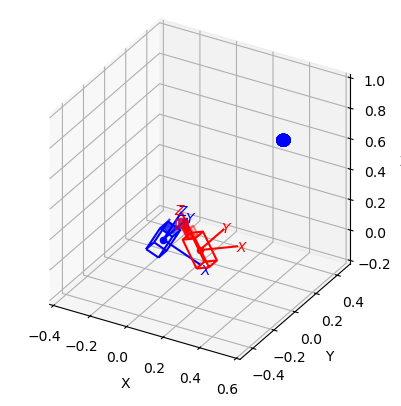

In [102]:
# define the point in the 3d world
ax = plotvol3([-0.4, 0.6, -0.5, 0.5, -0.2, 1]);
camera1.plot(ax=ax, scale=0.15, shape="camera", frame=True, color="blue")
camera2.plot(ax=ax, scale=0.15, shape="camera", frame=True, color="red")
plot_sphere(0.03, P, color="blue")

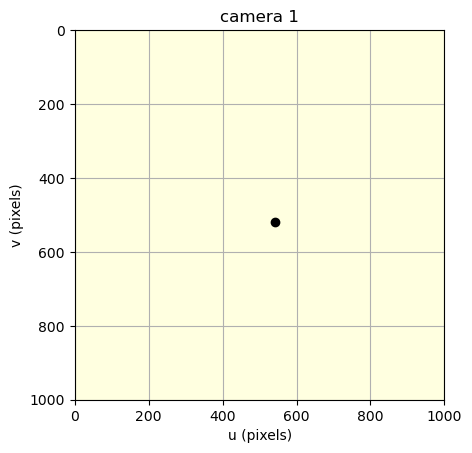

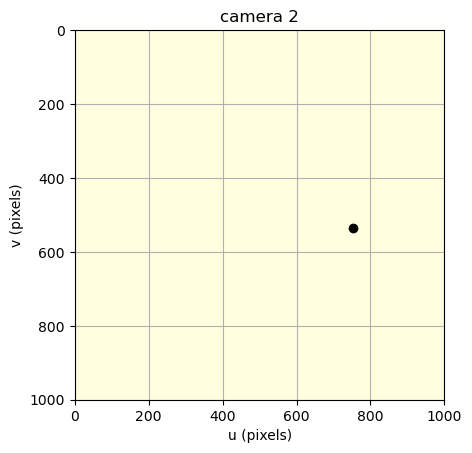

array([[     752],
       [     536]])

In [103]:
plotvol2(new=True)
p1 = camera1.plot_point(P)
p2 = camera2.plot_point(P)

In [104]:
p1_xyz = SE3((p1[0][0]-500)*camera1.rho[0], 0.002, (p1[1][0]-500)*camera1.rho[1])

   1         0         0         0.0004204  
   0         1         0         0.002     
   0         0         1         0.0002044  
   0         0         0         1         


In [118]:
# Position of the point in the 3D world coordinates
p1_xyz = CA * p1_xyz

   0.9063    0         0.4226   -0.09953   
   0         1         0         0.002     
  -0.4226    0         0.9063    7.567e-06  
   0         0         0         1         


In [120]:
p2_xyz = SE3((p2[0][0]-500)*camera2.rho[0], 0.002, (p2[1][0]-500)*camera2.rho[1])

   1         0         0         0.00252   
   0         1         0         0.002     
   0         0         1         0.0003597  
   0         0         0         1         


In [121]:
p2_xyz = CB * p2_xyz

   0.9063    0        -0.4226    0.1021    
   0         1         0         0.002     
   0.4226    0         0.9063    0.001391  
   0         0         0         1         


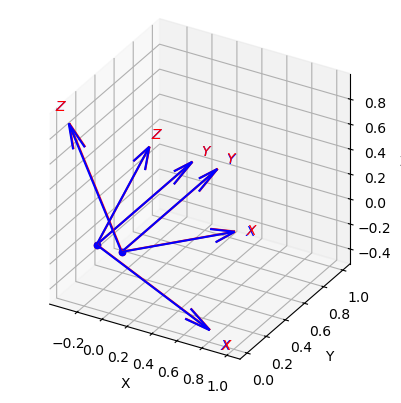

In [122]:
O = SE3(0,0,0)
# define the point in the 3d world
ax = plotvol3();
CA.plot()
CB.plot()
p1_xyz.plot(color='r')
p2_xyz.plot(color='r')